In [73]:
import os
import random
import numpy as np
from io import BytesIO

# Plotting and dealing with images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import tensorflow as tf
# Interactive widgets
from ipywidgets import widgets

In [74]:
TRAIN_DIR = 'archive/Train'

print(f"files in this director: {os.listdir()}")

car_brands_main_directory = os.listdir(TRAIN_DIR)

print(f"the subdirectories within {TRAIN_DIR}: {car_brands_main_directory}")

files in this director: ['archive', 'model.ipynb']
the subdirectories within archive/Train: ['hyundai', 'lexus', 'mazda', 'mercedes', 'opel', 'skoda', 'toyota', 'volkswagen']


In [75]:
# car_brands

for car_name in car_brands_main_directory:
    car_brand_directory = os.path.join(TRAIN_DIR, car_name)
    car_brand_image_names = os.listdir(car_brand_directory)
    print(f"the subdirectories are:{car_brand_directory} ")
    print(f"number of images in {car_brand_directory}: {len(os.listdir(car_brand_directory))}")
    print(f"5 files in this subdir: {car_brand_image_names[:5]}")
    print("\n")

print(f"total car brands: {len(car_brands_main_directory)}")

the subdirectories are:archive/Train/hyundai 
number of images in archive/Train/hyundai: 289
5 files in this subdir: ['11.5cm20x205.5cm-1024x768.jpg', '112886.jpg', '1_org_zoom.jpg', '2223.jpg', '41Vb8kVGvJL._AC_SS450_.jpg']


the subdirectories are:archive/Train/lexus 
number of images in archive/Train/lexus: 296
5 files in this subdir: ['-march-lexus-logo-sign-store-front-lexus-japanese-brand-automotive-113350042.jpg', '000003.jpg', '1062596372_w640_h640_emblema-lexus-150h106.jpg', '1974456.jpg', '1974460.jpg']


the subdirectories are:archive/Train/mazda 
number of images in archive/Train/mazda: 314
5 files in this subdir: ['-FAST-SHIPPING-Chrome-MazDa-Sticker-3D-MazDa-Logo-Badge-Decal-For-MazDa-3-6-Head.jpg', '-photocharacteristicdetail-usage-worldwide-credit-dpaalamy-live-news-2BPG7FD.jpg', '000-3d-model-Mazda2BLogo.jpg', '00000010828.jpg', '0000_51_852.jpg']


the subdirectories are:archive/Train/mercedes 
number of images in archive/Train/mercedes: 329
5 files in this subdir: ['

## There are some invalid images that are not accepted by the TensorFlow data pipeline:

- removing dodgy images


### The code below is something I found useful online. Some of my files did not work with the TensorFlow utils which was confusing hence this help remove files that are not recognized by the two libraries:
- cv2
- imghdr

basically the code below is preprocessing data

In [76]:
import cv2
import imghdr

image_exts = ['jpeg','jpg', 'bmp', 'png']

for image_class in os.listdir(TRAIN_DIR): 
    for image in os.listdir(os.path.join(TRAIN_DIR, image_class)):
        image_path = os.path.join(TRAIN_DIR, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

Corrupt JPEG data: 7 extraneous bytes before marker 0xee


(batch_size, height, width, channels) = (32, 256, 256, 3)

In [77]:
tf.keras.utils.image_dataset_from_directory??

Signature:
tf.keras.utils.image_dataset_from_directory(
    directory,
    labels='inferred',
    label_mode='int',
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False,
    **kwargs,
)
Source:   
@keras_export(
    "keras.utils.image_dataset_from_directory",
    "keras.preprocessing.image_dataset_from_directory",
    v1=[],
)
def image_dataset_from_directory(
    directory,
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    **kwargs,
):
    """Generates a `tf.data.Dataset` from image files in a directory.

    If your directory structure is:



To print all the file types

In [78]:
extensions = set()

for root, dirs, files in os.walk(TRAIN_DIR):
    for file in files:
        _, ext = os.path.splitext(file)
        ext = ext.lower()
        extensions.add(ext)

print("File extensions found:")
for ext in sorted(extensions):
    print(ext)

File extensions found:
.jpg


my questions:

- How can I make my model work for images sizes that are not all the same. 

- There is no built in dynamic graphs in TensorFlow. Two options:

1. Bucketing: You create multiple input tensors in a few hand picked sizes and then in runtime you choose the right bucket (see example). Either way you'll probably need the second option.

2. Resize the input and output images. Assuming the images all maintain the same aspect ration you can try resizing the image before inference. Not sure why you care about the output since MNIST is a classification task.


## LOAD DATA

In [94]:
# BATCH SIZE I HAVE SET FOR NOW

batch_size = 32
img_height = 300
img_width = 300

In [95]:
#TRAINING
train_ds = tf.keras.utils.image_dataset_from_directory(
  TRAIN_DIR,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2446 files belonging to 8 classes.
Using 1957 files for training.


In [96]:
#VALIDATION
val_ds = tf.keras.utils.image_dataset_from_directory(
  TRAIN_DIR,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2446 files belonging to 8 classes.
Using 489 files for validation.


In [97]:
class_names = train_ds.class_names
print(class_names)

['hyundai', 'lexus', 'mazda', 'mercedes', 'opel', 'skoda', 'toyota', 'volkswagen']


## visualizing the data

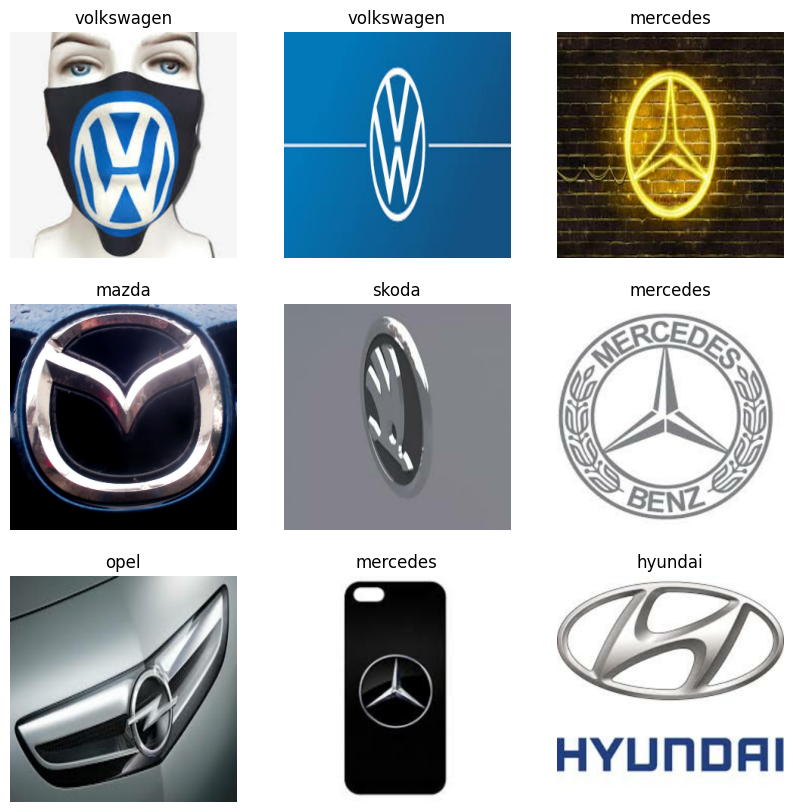

In [98]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [99]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 300, 300, 3)
(32,)


## 🚨SOLUTION🚨

- I have applied the validation and default image size for my images which I will have to test on different sizes to
  get the optimal solution 
- check notes/images_tensorflow_guide.ipynb


In [100]:
tf.config.list_physical_devices('GPU')

[]

## Data preprocessing continuation

In [101]:
normalization_layer = tf.keras.layers.Rescaling(1./255)

In [102]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.021786278 0.9908499


In [103]:
# YOU CAN ALSO DO:
# normalized_ds = train_ds.map(lambda x,y: (x/255, y))

### Why normalization

- Most images store pixel values in the range [0, 255] as uint8 integers. But neural networks — especially those using ReLU, sigmoid, or tanh activations — tend to perform better when inputs are small real numbers, usually in the range [0, 1] or [-1, 1].

My notes:

| Scenario                                         | Should Normalize?                               | Why                                                                       |
| ------------------------------------------------ | ----------------------------------------------- | ------------------------------------------------------------------------- |
| Most image classification models (e.g., CNNs)    | ✅ Yes                                           | Stabilizes training and improves convergence.                             |
| Pretrained models (e.g., ResNet, VGG)            | ⚠️ Yes, but follow their expected input scaling | Some expect \[0, 1], others \[-1, 1], or even specific ImageNet mean/std. |
| Autoencoders, GANs, segmentation                 | ✅ Yes                                           | Helps reconstruct and generate cleaner images.                            |
| Color-sensitive tasks (e.g., colorization)       | ✅ Still normalize                               | But often preserve relative color ratios.                                 |
| Traditional ML on non-image data (e.g., tabular) | Not related                                     | Use other scalers like StandardScaler, MinMaxScaler.                      |


### Configure the dataset for performance

In [104]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

## CALLBACK

In [153]:
class EarlyStoppingCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        if logs['val_accuracy'] >= 0.95:
            self.model.stop_training = True
            print("\nReached >= 95% validation accuracy. Stopped training")

In [154]:
from keras.callbacks import EarlyStopping

early_stop = EarlyStopping(
    monitor='val_loss',
    patience=3,         # stop if val_loss doesn't improve for 3 epochs
    restore_best_weights=True
)

## TRAIN THE MODEL


In [167]:
model = tf.keras.Sequential([
    tf.keras.Input(shape=(300,300,3)),

    #i have normalised on top: normalised_ds
    #but this uses the default: train_ds
    tf.keras.layers.Rescaling(1./255), 

    # Data Augmentation
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomRotation(0.05),
    tf.keras.layers.RandomZoom(0.05),

    # tf.keras.layers.Conv2D(32,(3,3), activation='relu')
    tf.keras.layers.Conv2D(16, 3, activation='relu'),
    #no parameters in MaxPooling2D takes default: pool_size=(2, 2) 
    tf.keras.layers.MaxPooling2D(),

    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),

    tf.keras.layers.Conv2D(64, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),

    tf.keras.layers.Conv2D(128, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),

    # tf.keras.layers.Conv2D(64, 3, activation='relu'),
    # tf.keras.layers.MaxPooling2D(),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5), #helps prevent overfitting
    tf.keras.layers.Dense(8,activation='softmax') #number of classes = 8
])

model.summary()

Model: "sequential_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_31 (Rescaling)    (None, 300, 300, 3)       0         
                                                                 
 random_flip_6 (RandomFlip)  (None, 300, 300, 3)       0         
                                                                 
 random_rotation_6 (RandomR  (None, 300, 300, 3)       0         
 otation)                                                        
                                                                 
 random_zoom_6 (RandomZoom)  (None, 300, 300, 3)       0         
                                                                 
 conv2d_93 (Conv2D)          (None, 298, 298, 16)      448       
                                                                 
 max_pooling2d_93 (MaxPooli  (None, 149, 149, 16)      0         
 ng2D)                                               

Choose the **tf.keras.optimizers.Adam** optimizer and **tf.keras.losses.SparseCategoricalCrossentropy** loss function. To view training and validation accuracy for each training epoch, pass the metrics argument to Model.compile.

In [168]:
model.compile(
  optimizer='adam',
  loss=tf.keras.losses.SparseCategoricalCrossentropy(),
  metrics=['accuracy'])

In [169]:
model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=20,
  callbacks=[early_stop]

)

Epoch 1/20
62/62 [==============================] - 13s 200ms/step - loss: 2.0855 - accuracy: 0.1175 - val_loss: 2.0784 - val_accuracy: 0.1288
Epoch 2/20
62/62 [==============================] - 12s 201ms/step - loss: 2.0256 - accuracy: 0.1865 - val_loss: 1.9832 - val_accuracy: 0.2311
Epoch 3/20
62/62 [==============================] - 13s 204ms/step - loss: 1.9585 - accuracy: 0.2412 - val_loss: 2.0303 - val_accuracy: 0.2249
Epoch 4/20
62/62 [==============================] - 13s 208ms/step - loss: 1.9042 - accuracy: 0.2770 - val_loss: 1.8641 - val_accuracy: 0.2781
Epoch 5/20
62/62 [==============================] - 13s 210ms/step - loss: 1.7829 - accuracy: 0.3470 - val_loss: 1.6863 - val_accuracy: 0.3865
Epoch 6/20
62/62 [==============================] - 13s 210ms/step - loss: 1.6081 - accuracy: 0.4241 - val_loss: 1.5594 - val_accuracy: 0.4581
Epoch 7/20
62/62 [==============================] - 13s 211ms/step - loss: 1.4682 - accuracy: 0.4977 - val_loss: 1.5008 - val_accuracy: 0.4826